In [3]:
import imagej
import pandas as pd
import scyjava as sj

In [4]:
ij = imagej.init(mode='headless')
imp = ij.IJ.openImage("C:/Users/destr/Desktop/Porosity Images/Optical Image/1240-X500-70%.tif")

Operating in headless mode - the original ImageJ will have limited functionality.
Operating in headless mode - the IJ class will not be fully functional.


In [5]:
ij.IJ.run(imp, "Set Scale...", "distance=246.0183 known=50 unit=µm")
ij.IJ.run(imp, "8-bit", "")
ij.IJ.setAutoThreshold(imp, "Default dark no-reset")
ij.IJ.setRawThreshold(imp, 0, 95)
ij.IJ.run("Set Measurements...", "area mean standard modal min feret's median area_fraction redirect=None decimal=3")
ij.IJ.run(imp, "Measure", "")

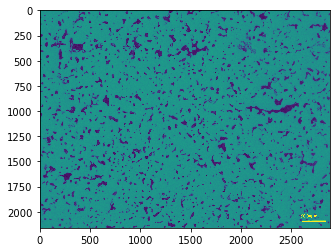

In [6]:
ij.py.show(imp)

In [7]:
# Access the ResultsTable class using scyjava
ResultsTable1 = sj.jimport('ij.measure.ResultsTable')
rt1 = ResultsTable1.getResultsTable()

# Convert the results table to a pandas DataFrame
headings1 = [str(heading) for heading in rt1.getHeadings()]
data1 = {heading: list(rt1.getColumn(rt1.getColumnIndex(heading))) for heading in headings1}

df1 = pd.DataFrame(data1)

# Display the DataFrame
print(df1)

perArea = df1["%Area"][0]

           Area        Mean    StdDev   Mode  Min    Max   Feret  Median  \
0  256951.65625  119.572197  31.35737  132.0  0.0  255.0  3600.0   131.0   

       %Area  FeretX  FeretY  FeretAngle  MinFeret  
0  12.931214     0.0     0.0  143.130096    2160.0  


In [8]:
imp = ij.IJ.openImage("C:/Users/destr/Desktop/Porosity Images/Optical Image/1240-X500-70%.tif")
ij.IJ.run(imp, "Set Scale...", "distance=246.0183 known=50 unit=µm")
ij.IJ.run(imp, "8-bit", "")
ij.IJ.setAutoThreshold(imp, "Default dark no-reset")
ij.IJ.setRawThreshold(imp, 0, 95)
ij.IJ.run(imp, "Convert to Mask", "")
ij.IJ.run(imp, "Analyze Particles...", "display summarize")

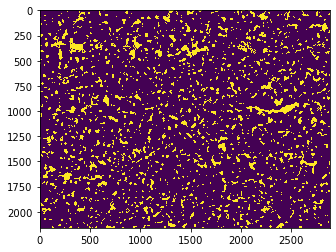

In [9]:
ij.py.show(imp)

In [10]:
# Access the ResultsTable class using scyjava
ResultsTable = sj.jimport('ij.measure.ResultsTable')
rt = ResultsTable.getResultsTable()

# Convert the results table to a pandas DataFrame
headings = [str(heading) for heading in rt.getHeadings()]
data = {heading: list(rt.getColumn(rt.getColumnIndex(heading))) for heading in headings}

df = pd.DataFrame(data)

df.drop(["Mean", "StdDev", "Mode", "Min", "Max", "Median", "%Area"], axis=1, inplace=True)
df.drop(0, inplace=True)

# Display the DataFrame
print(df)

            Area      Feret  FeretX  FeretY  FeretAngle   MinFeret
1       0.289137   1.437102   545.0     0.0  171.869904   0.203237
2       8.921932   4.544516   625.0     0.0  169.695160   2.642080
3       0.247831   1.236242   821.0     0.0  170.537674   0.203237
4       0.123916   0.642692   985.0     0.0  161.565048   0.203237
5     199.008667  27.916794  1233.0   103.0   47.950779  17.642981
...          ...        ...     ...     ...         ...        ...
1986    3.428335   3.708726   375.0  2157.0  170.537674   1.625895
1987    3.221809   4.714045   515.0  2160.0    7.431408   1.219422
1988    2.354399   3.055321   884.0  2159.0  176.185928   1.219422
1989    0.041305   0.287420  1305.0  2154.0  135.000000   0.203237
1990    1.280463   3.258136    19.0  2159.0  176.423660   0.609711

[1990 rows x 6 columns]


In [11]:
numPores = len(df)

areaSum = df["Area"].sum()

avgArea = areaSum/numPores

avgFeret = df["Feret"].sum()/numPores

avgFeretX = df["FeretX"].sum()/numPores

avgFeretY = df["FeretY"].sum()/numPores

avgFeretAng = df["FeretAngle"].sum()/numPores

summary_dict = {'Count': numPores, 
           'Total Area': areaSum, 
           'Average Size': avgArea,
           '%Area': perArea,
           'Feret': avgFeret,
           'FeretX': avgFeretX,
           'FeretY': avgFeretY,
           'FeretAngle': avgFeretAng}
summary = pd.Series(summary_dict)
print(summary)

Count            1990.000000
Total Area      33226.970191
Average Size       16.696970
%Area              12.931214
Feret               5.309071
FeretX           1454.879899
FeretY           1097.634171
FeretAngle         93.513327
dtype: float64


In [12]:
df.to_excel('PoresResults.xlsx')
summary.to_excel('PoresSummary.xlsx')